In [4]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

<IPython.core.display.Javascript object>

In [6]:
data_path = "data/physician-visits.csv"
df = pd.read_csv(data_path, index_col=0)

<IPython.core.display.Javascript object>

In [7]:
rename_map = {
    "ofp": "n_phys_visits",
    "ofnp": "n_non_phys_visits",
    "opp": "n_phys_outpatient",
    "opnp": "n_non_phys_outpatient",
    "emr": "n_er_visits",
    "hosp": "n_hosp_visits",
    "numchron": "n_chronic_cond",
    "adldiff": "has_limiting_cond",
    "faminc": "family_income",
    "privins": "prvt_ins",
    "hlth": "health",
}

<IPython.core.display.Javascript object>

In [10]:
df = df.rename(columns=rename_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 1 to 4406
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   n_phys_visits          4406 non-null   int64  
 1   n_non_phys_visits      4406 non-null   int64  
 2   n_phys_outpatient      4406 non-null   int64  
 3   n_non_phys_outpatient  4406 non-null   int64  
 4   n_er_visits            4406 non-null   int64  
 5   n_hosp_visits          4406 non-null   int64  
 6   n_chronic_cond         4406 non-null   int64  
 7   has_limiting_cond      4406 non-null   int64  
 8   age                    4406 non-null   float64
 9   black                  4406 non-null   object 
 10  sex                    4406 non-null   object 
 11  maried                 4406 non-null   object 
 12  school                 4406 non-null   int64  
 13  family_income          4406 non-null   float64
 14  employed               4406 non-null   object 
 15  prvt

<IPython.core.display.Javascript object>

In [11]:
df.head(3)

,n_phys_visits,n_non_phys_visits,n_phys_outpatient,n_non_phys_outpatient,n_er_visits,n_hosp_visits,n_chronic_cond,has_limiting_cond,age,black,sex,maried,school,family_income,employed,prvt_ins,medicaid,region,health
1,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
2,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
3,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor


<IPython.core.display.Javascript object>

In [12]:
df["health"].value_counts()

other        3509
poor          554
excellent     343
Name: health, dtype: int64

<IPython.core.display.Javascript object>

In [13]:
# df.replace({'yes':1, 'no', 0})
df.dtypes

n_phys_visits              int64
n_non_phys_visits          int64
n_phys_outpatient          int64
n_non_phys_outpatient      int64
n_er_visits                int64
n_hosp_visits              int64
n_chronic_cond             int64
has_limiting_cond          int64
age                      float64
black                     object
sex                       object
maried                    object
school                     int64
family_income            float64
employed                  object
prvt_ins                  object
medicaid                  object
region                    object
health                    object
dtype: object

<IPython.core.display.Javascript object>

Does level of health relate to family income?

In [14]:
# total number of nas
df.isna().sum().sum()

0

<IPython.core.display.Javascript object>

In [15]:
df.health.value_counts()

other        3509
poor          554
excellent     343
Name: health, dtype: int64

<IPython.core.display.Javascript object>

In [17]:
df[["health", "family_income"]].dtypes

health            object
family_income    float64
dtype: object

<IPython.core.display.Javascript object>

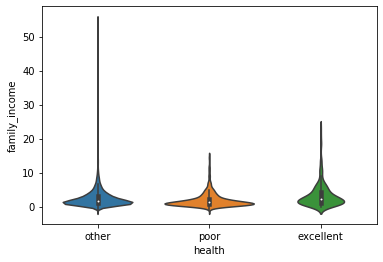

<IPython.core.display.Javascript object>

In [18]:
# like swarm plot but too much here
sns.violinplot("health", "family_income", data=df)

In [19]:
df.groupby("health").agg({"family_income": ["mean", "median"]})

family_income        
                   mean  median
health                         
excellent      3.277411  2.2719
other          2.551990  1.7469
poor           1.905162  1.1988

<IPython.core.display.Javascript object>

In [20]:
# TODO: follow up on other. can it include potentially good/poor health participants
# a lot of tools are built around the todo comment

<IPython.core.display.Javascript object>

need to check assumptions:
continuous? yep
independent? yep

In [21]:
other = df[df["health"] == "other"]
poor = df[df["health"] == "poor"]
excellent = df[df["health"] == "excellent"]

<IPython.core.display.Javascript object>

In [22]:
# do the qq plots, won't show here

<IPython.core.display.Javascript object>

In [ ]:
#if you want to use logs:
#df=df[df['family_income']>0]

In [27]:
# kruskal
stats.kruskalstats.kruskal(
    other["family_income"], poor["family_income"], excellent["family_income"]
)

NameError: name 'stats' is not defined

<IPython.core.display.Javascript object>